# Plot STATS

In [ ]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
base_dir = "../../res/MIP"  

df = pd.DataFrame()
for fname in sorted(os.listdir(base_dir)):
    if fname.endswith(".json"):
        n_part = os.path.splitext(fname)[0]
        try:
            n = int(n_part)
        except ValueError:
            continue
        json_path = os.path.join(base_dir, fname)
        with open(json_path, "r") as f:
            data = json.load(f)
            for name, metrics in data.items():
                cols = {}
                cols['time'] = metrics['time']
                cols['ic'] = 'ic' if not 'no_ic' in name.lower() else 'no_ic'
                cols['solver'] = 'glpk' if 'glpk' in name.lower() else ('cbc' if 'cbc' in name.lower() else 'gurobi')
                cols['model'] = 'circleMatching' if 'circleMatching' in name else ('4dArray' if '4dArray' in name else 'none')
                cols['version'] = 'decision' if 'decision' in name else ('optimization' if 'optimization' in name else 'none')
                cols['n'] = n
                df = df.append(cols, ignore_index=True)

df.sort_values(by=['n', 'solver', 'version', 'model', 'ic'], inplace=True)
df.head()

,ic,model,n,solver,time,version
71,ic,4dArray,6.0,cbc,0.0,decision
69,no_ic,4dArray,6.0,cbc,0.0,decision
79,ic,circleMatching,6.0,cbc,0.0,decision
77,no_ic,circleMatching,6.0,cbc,0.0,decision
75,ic,4dArray,6.0,cbc,2.0,optimization


In [85]:
# fill for missing n
for n in range(6,17,2):
    for solver in ['gurobi', 'cbc', 'glpk']:
        for version in ['decision', 'optimization']:
            for model in ['circleMatching', '4dArray']:
                for ic in ['ic', 'no_ic']:
                    if len(df[(df['n'] == n) & (df['solver'] == solver) & (df['version'] == version) & (df['model'] == model) & (df['ic'] == ic)]) == 0:
                        df = df.append({'n': n, 'solver': solver, 'version': version, 'model': model, 'ic': ic, 'time': 300}, ignore_index=True)

optimization

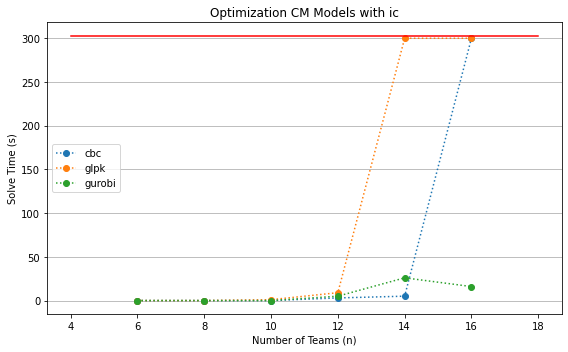

In [91]:
df_opt = df[(df['version'] == 'optimization')  & (df['model'] == 'circleMatching') & (df['ic'] == 'ic')]

plt.figure(figsize=(8, 5))
for solver in df_opt['solver'].unique():
    df_solver = df_opt[(df_opt['solver'] == solver)]
    plt.plot(df_solver['n'], df_solver['time'], marker='o', linestyle=':', label=solver)
plt.plot([4,18], [303,303], c='r')
plt.xticks(range(4, 19, 2))
plt.legend(title='Solver')
plt.xlabel('Number of Teams (n)')
plt.ylabel('Solve Time (s)')
plt.title('Optimization CM Models with ic')
plt.legend(loc='center left')
plt.tight_layout()
plt.grid(True, which='both', axis='y')
plt.show()

decision

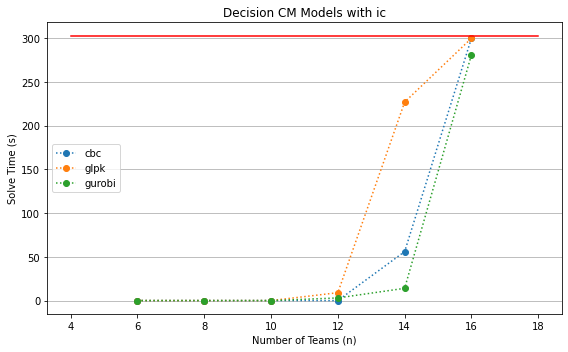

In [ ]:
df_opt = df[(df['version'] == 'decision')  & (df['model'] == 'circleMatching') & (df['ic'] == 'ic')]

plt.figure(figsize=(8, 5))
for solver in df_opt['solver'].unique():
    df_solver = df_opt[(df_opt['solver'] == solver)]
    plt.plot(df_solver['n'], df_solver['time'], marker='o', linestyle=':', label=solver)
plt.plot([4,18], [303,303], c='r')
plt.xticks(range(4, 19, 2))
plt.legend(title='Solver')
plt.xlabel('Number of Teams (n)')
plt.ylabel('Solve Time (s)')
plt.title('Decision CM Models with ic')
plt.legend(loc='center left')
plt.tight_layout()
plt.grid(True, which='both', axis='y')
plt.show()

4d array vs circle matching

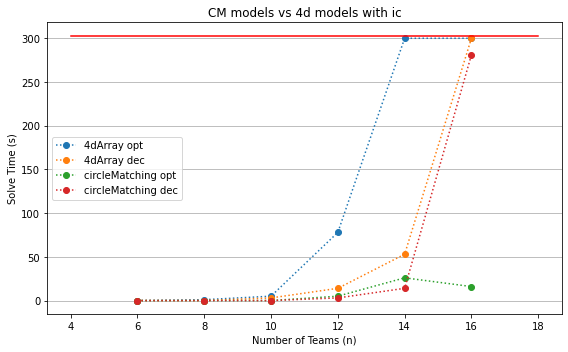

In [92]:
df_opt = df[(df['solver'] == 'gurobi') & (df['ic'] == 'ic')]

plt.figure(figsize=(8, 5))
for model in df_opt['model'].unique():
    df_version = df_opt[(df_opt['model'] == model) & (df_opt['version'] == 'optimization')]
    plt.plot(df_version['n'], df_version['time'], marker='o', linestyle=':', label=model+' opt')
    df_version = df_opt[(df_opt['model'] == model) & (df_opt['version'] == 'decision')]
    plt.plot(df_version['n'], df_version['time'], marker='o', linestyle=':', label=model+' dec')
plt.plot([4,18], [303,303], c='r')
plt.xticks(range(4, 19, 2))
plt.legend(title='Solver')
plt.xlabel('Number of Teams (n)')
plt.ylabel('Solve Time (s)')
plt.title('CM models vs 4d models with ic')
plt.legend(loc='center left')
plt.tight_layout()
plt.grid(True, which='both', axis='y')
plt.show()

ic vs no ic

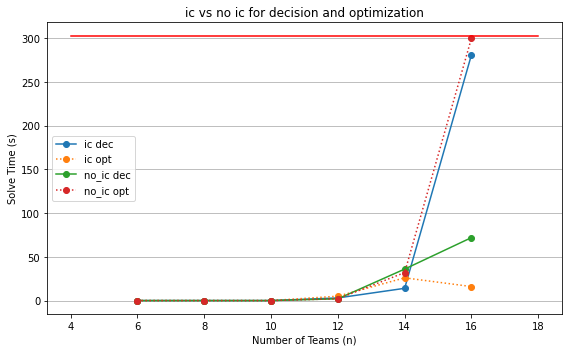

In [93]:
df_opt = df[(df['model'] == 'circleMatching')  & (df['solver'] == 'gurobi')]

plt.figure(figsize=(8, 5))
for ic in df_opt['ic'].unique():
    df_solver = df_opt[(df_opt['ic'] == ic) & (df_opt['version'] == 'decision')]
    plt.plot(df_solver['n'], df_solver['time'], marker='o', linestyle='-', label=ic+' dec')
    df_solver = df_opt[(df_opt['ic'] == ic) & (df_opt['version'] == 'optimization')]
    plt.plot(df_solver['n'], df_solver['time'], marker='o', linestyle=':', label=ic+' opt')
plt.plot([4,18], [303,303], c='r')
plt.xticks(range(4, 19, 2))
plt.legend(title='Solver')
plt.xlabel('Number of Teams (n)')
plt.ylabel('Solve Time (s)')
plt.title('ic vs no ic for decision and optimization')
plt.legend(loc="center left")
plt.tight_layout()
plt.grid(True, which='both', axis='y')
plt.show()

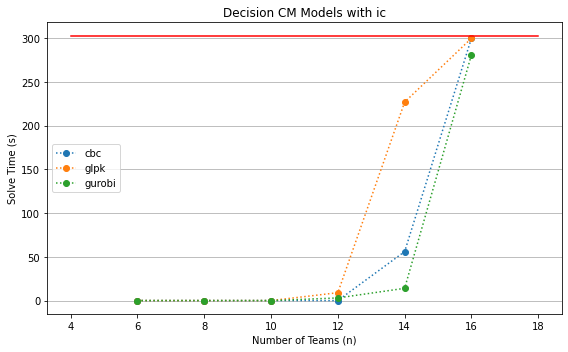

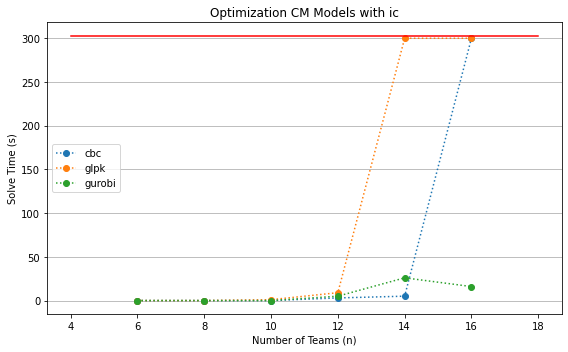

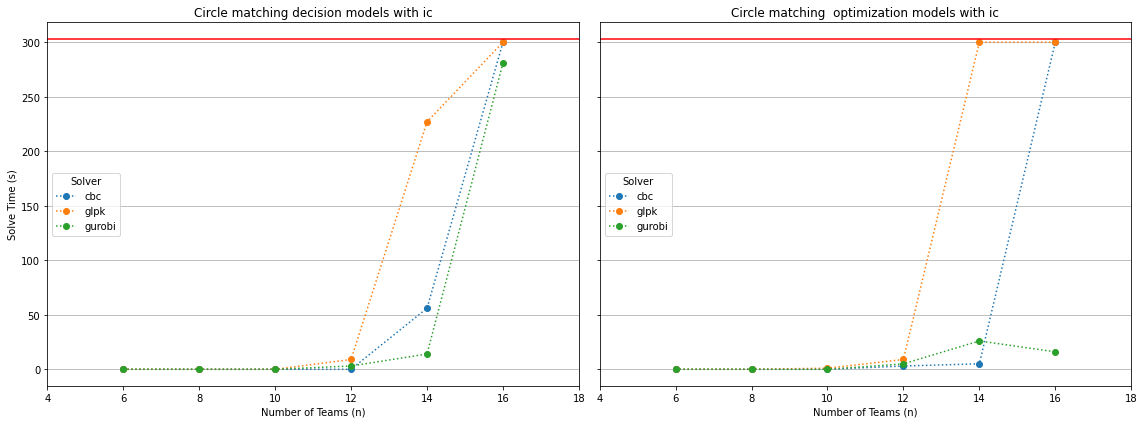

In [97]:
df_opt = df[(df['version'] == 'decision')  & (df['model'] == 'circleMatching') & (df['ic'] == 'ic')]

plt.figure(figsize=(8, 5))
for solver in df_opt['solver'].unique():
    df_solver = df_opt[(df_opt['solver'] == solver)]
    plt.plot(df_solver['n'], df_solver['time'], marker='o', linestyle=':', label=solver)
plt.plot([4,18], [303,303], c='r')
plt.xticks(range(4, 19, 2))
plt.legend(title='Solver')
plt.xlabel('Number of Teams (n)')
plt.ylabel('Solve Time (s)')
plt.title('Decision CM Models with ic')
plt.legend(loc='center left')
plt.tight_layout()
plt.grid(True, which='both', axis='y')
plt.show()

df_opt = df[(df['version'] == 'optimization')  & (df['model'] == 'circleMatching') & (df['ic'] == 'ic')]

plt.figure(figsize=(8, 5))
for solver in df_opt['solver'].unique():
    df_solver = df_opt[(df_opt['solver'] == solver)]
    plt.plot(df_solver['n'], df_solver['time'], marker='o', linestyle=':', label=solver)
plt.plot([4,18], [303,303], c='r')
plt.xticks(range(4, 19, 2))
plt.legend(title='Solver')
plt.xlabel('Number of Teams (n)')
plt.ylabel('Solve Time (s)')
plt.title('Optimization CM Models with ic')
plt.legend(loc='center left')
plt.tight_layout()
plt.grid(True, which='both', axis='y')
# combine decision and optimization into subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# decision subplot
df_dec = df[(df['version'] == 'decision') & (df['model'] == 'circleMatching') & (df['ic'] == 'ic')]
ax = axes[0]
for solver in df_dec['solver'].unique():
    df_solver = df_dec[df_dec['solver'] == solver]
    ax.plot(df_solver['n'], df_solver['time'], marker='o', linestyle=':', label=solver)
ax.axhline(303, color='r')
ax.set_xticks(range(4, 19, 2))
ax.set_xlabel('Number of Teams (n)')
ax.set_ylabel('Solve Time (s)')
ax.set_title('Circle matching decision models with ic')
ax.legend(title='Solver', loc='center left')
ax.grid(True, which='both', axis='y')

# optimization subplot
df_opt = df[(df['version'] == 'optimization') & (df['model'] == 'circleMatching') & (df['ic'] == 'ic')]
ax = axes[1]
for solver in df_opt['solver'].unique():
    df_solver = df_opt[df_opt['solver'] == solver]
    ax.plot(df_solver['n'], df_solver['time'], marker='o', linestyle=':', label=solver)
ax.axhline(303, color='r')
ax.set_xticks(range(4, 19, 2))
ax.set_xlabel('Number of Teams (n)')
ax.set_title('Circle matching  optimization models with ic')
ax.legend(title='Solver', loc='center left')
ax.grid(True, which='both', axis='y')

plt.tight_layout()
plt.show()

-------------------